# Продвинутые методы работы в Pandas

In [ ]:
import pandas as pd


melb_df = pd.read_csv('data/melb_data_fe.csv')
melb_df.head()

In [2]:
melb_df['Date'] = pd.to_datetime(melb_df['Date'])


In [ ]:
quarter = melb_df['Date'].dt.quarter.info()
print(quarter)

In [ ]:
cols_to_exclude = ['Date', 'Rooms', 'Bedroom', 'Bathroom', 'Car'] # список столбцов, которые мы не берём во внимание
max_unique_count = 150 # задаём максимальное число уникальных категорий
count = 0

for col in melb_df.columns: # цикл по именам столбцов
    if melb_df[col].nunique() < max_unique_count and col not in cols_to_exclude: # проверяем условие
        melb_df[col] = melb_df[col].astype('category') # преобразуем тип столбца
        count += 1
        
print(count)

## Метод sort_values()

Для сортировки значений в DataFrame по значениям одного или нескольких столбцов используется метод sort_values().

In [ ]:
melb_df.sort_values(by='Price').head()


А теперь отсортируем таблицу по убыванию (от самой последней до самой первой) даты продажи объекта (Date). Для этого выставим параметр ascending на False:

In [ ]:
melb_df.sort_values(by='Date', ascending=False)

### Сортировка по значениям нескольких столбцов

Для сортировки по значениям нескольких столбцов необходимо передать названия этих столбцов в параметр by в виде списка. При этом важно обращать внимание на порядок следования столбцов.

Так, например, отсортируем таблицу сначала по возрастанию расстояния от центра города (Distance), а затем — по возрастанию цены объекта (Price). Для того чтобы вывод был более наглядным, выделим каждую десятую строку из столбцов Distance и Price результирующей таблицы:

In [ ]:
melb_df.sort_values(by=['Distance', 'Price']).loc[::10, ['Distance', 'Price']]

Мы получили таблицу, отсортированную по возрастанию расстояния до центра города. Если встречаются объекты недвижимости, у которых расстояние оказывается одинаковым, то внутри такой группы производится сортировка по цене объекта.

### Комбинирование сортировки с фильтрацией

Найдём информацию о таунхаусах (Type), проданных компанией (SellerG) McGrath, у которых коэффициент соотношения площадей здания и участка (AreaRatio) меньше -0.8. Результат отсортируем по дате продажи (Date) в порядке возрастания, а после проведём сортировку по убыванию коэффициента соотношения площадей. Также обновим старые индексы на новые, установив параметр ignore_index на True. Для наглядности результата выберем из таблицы только столбцы Data и AreaRatio:

In [ ]:
mask1 = melb_df['AreaRatio'] < -0.8
mask2 = melb_df['Type'] == 'townhouse'
mask3 = melb_df['SellerG'] == 'McGrath'
melb_df[mask1 & mask2 & mask3].sort_values(
    by=['Date', 'AreaRatio'],
    ascending=[True, False],
    ignore_index=True
).loc[:, ['Date', 'AreaRatio']]

Примечание. Старайтесь не сочетать фильтрацию и метод sort_values() с параметром inplace=True, так как в таком случае у вас возникнет предупреждение (warning) SettingWithCopyWarning: melb_df[melb_df['Rooms'] > 5].sort_values(inplace=True, by=['Rooms']):

Произведите сортировку столбца AreaRatio по убыванию. После сортировки замените индексы таблицы на новые. Какое значение площади здания находится в строке 1558? Ответ округлите до целого числа.

In [ ]:
melb_df.sort_values(by='AreaRatio', ascending=False, ignore_index=True).loc[1558]


Найдите таунхаусы (Type) с количеством жилых комнат (Rooms) больше 2. Отсортируйте полученную таблицу сначала по возрастанию числа комнат, а затем по убыванию средней площади комнат (MeanRoomsSquare). Индексы таблицы замените на новые. Какая цена будет у объекта в строке 18? Ответ запишите в виде целого числа.

In [ ]:
mask1 = melb_df['Type'] == 'townhouse'
mask2 = melb_df['Rooms'] > 2

melb_df[mask1 & mask2].sort_values(
    by=['Rooms', 'MeanRoomsSquare'],
    ascending=[True, False],
    ignore_index=True
).loc[18]

## Метод groupby()

В библиотеке Pandas для группировки данных по одному или нескольким признакам можно использовать метод groupby().

Метод groupby() возвращает объект DataFrameGroupBy, который хранит в себе информацию о том, какие строки относятся к определённой группе, и сам по себе не представляет для нас интереса. 

Однако к этому объекту можно применять уже знакомые нам агрегирующие методы (mean, median, sum и т. д.), чтобы рассчитывать показатели внутри каждой группы.


by — имя или список имён столбцов, по которым производится группировка.

axis — ось, по которой производится группировка (0 — строки, 1 — столбцы). По умолчанию группировка производится по строкам.

as_index — добавляется ли дополнительный индекс к таблице. По умолчанию установлен на True.




### Группировка данных по одному критерию с одной агрегацией

Применим агрегирующую функцию среднего к результату работы groupby(). В качестве столбца для группировки возьмём столбец типа объекта недвижимости (Type):

In [ ]:
melb_df.groupby(by='Type').mean(numeric_only=True)

Примечание. Если мы хотим видеть тип объекта в качестве отдельного столбца таблицы, мы можем выставить параметр as_index на False:

In [ ]:
melb_df.groupby(by='Type', as_index=False).mean(numeric_only=True)

Как правило, нам не нужна информация обо всех столбцах, поэтому агрегирующие методы можно применять только к интересующему нас столбцу. Например, давайте сравним средние цены на объекты в зависимости от их типа:

In [ ]:
melb_df.groupby('Type')['Price'].mean()

Теперь давайте выясним, какие регионы (Regionname) наиболее удалены от центра Мельбурна.

Для этого найдём минимальное значение расстояния от центра города до объекта в зависимости от его региона. Результат отсортируем по убыванию расстояния:

In [ ]:
melb_df.groupby('Regionname')['Distance'].min().sort_values(ascending=False)

### Группировка данных по одному критерию с несколькими агрегациями

Чтобы рассчитать несколько агрегирующих методов, можно воспользоваться методом agg(), который принимает список строк с названиями агрегаций.

Давайте построим таблицу для анализа продаж по месяцам. Для этого найдём количество продаж, а также среднее и максимальное значения цен объектов недвижимости (Price), сгруппированных по номеру месяца продажи (MonthSale). Результат отсортируем по количеству продаж в порядке убывания:

In [ ]:
melb_df.groupby('MonthSale')['Price'].agg(
    ['count', 'mean', 'max']
).sort_values(by='count', ascending=False)

В результате применения метода agg(), в который мы передали список с названиями интересующих нас агрегирующих функций, мы получаем DataFrame со столбцами count, mean и max, где для каждого месяца рассчитаны соответствующие параметры. Результат сортируем по столбцу count.

?
Какие интересные выводы можно сделать из этой таблицы?

1
Пик продаж приходится на период весна-лето.

2
Средняя цена продаваемых объектов относительно стабильна и находится в пределах 1 млн. австралийских долларов с небольшими отклонениями (около 100 тыс. влево и вправо).

3
Прослеживается некоторая зависимость между сезоном и максимальной ценой объектов: в месяцы с большим спросом на объекты недвижимости цена также имеет наибольшие показатели. Можно сделать предположение, что это связано с повышением цен на элитные дома в периоды большого спроса.

Примечание. Если вам нужна полная информация обо всех основных статистических характеристиках внутри каждой группы, вы можете воспользоваться методом agg(), передав в качестве его параметра строку 'describe':

In [ ]:
melb_df.groupby('MonthSale')['Price'].agg('describe')

После базовых математических функций наиболее частым агрегированием является подсчёт числа уникальных значений. Так, например, мы можем вычислить число уникальных риелторских компаний в зависимости от региона, чтобы понять, в каких регионах конкуренция на рынке недвижимости меньше. Это можно сделать, передав в параметр метода agg() строку 'nunique'. 

Более того, метод agg() поддерживает использование и других функций. Передадим дополнительно встроенную функцию set, чтобы получить множество из агентств недвижимости, которые работают в каждом из регионов:

In [ ]:
melb_df.groupby('Regionname')['SellerG'].agg(
    		['nunique', set]
)

## Сводные таблицы

✍ Сводные таблицы — это распространённый инструмент для агрегации данных.

 Сводная таблица принимает на вход данные из отдельных столбцов и группирует их. В результате получается новая таблица, которая позволяет увидеть многомерное обобщение данных. Таким образом, благодаря сводным таблицам мы можем оценить зависимость между двумя и более признаками данных.

### Метод groupby как способ построения сводных таблиц

На самом деле мы с вами уже строили простейшие одномерные сводные таблицы с помощью метода groupby — мы рассматривали сводную таблицу в контексте группировки по одному признаку. 

Например, мы уже умеем строить таблицу, которая показывает зависимость медианной цены и площади здания от числа комнат:



In [ ]:
melb_df.groupby('Rooms')[['Price', 'BuildingArea']].median()

Также можно построить таблицу, в которой мы будем учитывать не только число комнат, но и тип здания (Type). Для этого в параметрах метода groupby() укажем список из нескольких интересующих нас столбцов.

In [ ]:
melb_df.groupby(['Rooms', 'Type'])['Price'].mean()

В результате выполнения такого кода мы получаем Series, которая обладает несколькими уровнями индексов: первый уровень — число комнат, второй уровень — тип здания. Такая организация индексов называется иерархической. Вычисление параметра (средней цены) происходит во всех возможных комбинациях признаков.

Для того, чтобы финальный результат был представлен в виде сводной таблицы (первый группировочный признак по строкам, а второй — по столбцам), а не в виде Series с иерархическими индексами, к результату чаще всего применяют метод unstack(), который позволяет переопределить вложенный индекс в виде столбцов таблицы:

In [ ]:
melb_df.groupby(['Rooms', 'Type'])['Price'].mean().unstack()

В результате мы получаем сводную таблицу, столбцы в которой представляют типы домов (house, townhouse, unit), строки — число комнат, а на пересечении строк и столбцов находится средняя стоимость объекта с такими показателями.

### Метод pivot_table для построения сводных таблиц

На самом деле метод groupby редко используется при двух параметрах, так как для построения сводных таблиц существует специальный и более простой метод — pivot_table().

values — имя столбца, по которому необходимо получить сводные данные, применяя агрегирующую функцию;

index — имя столбца, значения которого станут строками сводной таблицы;

columns — имя столбца, значения которого станут столбцами сводной таблицы;

aggfunc — имя или список имён агрегирующих функций (по умолчанию — подсчёт среднего, 'mean');

fill_value — значение, которым необходимо заполнить пропуски (по умолчанию пропуски не заполняются).

Давайте построим ту же самую таблицу, но уже с использованием метода pivot_table. В качестве параметра values укажем столбец Price, в качестве индексов сводной таблицы возьмём Rooms, а в качестве столбцов — Type. Агрегирующую функцию оставим по умолчанию (среднее). Дополнительно заменим пропуски в таблице на значение 0. Финальный результат для наглядности вывода округлим с помощью метода round() до целых.

In [ ]:
melb_df.pivot_table(
    values='Price',
    index='Rooms',
    columns='Type',
    fill_value=0
).round()

А теперь давайте проанализируем продажи в каждом из регионов в зависимости от того, будний был день или выходной. Для этого построим сводную таблицу, в которой строками будут являться названия регионов (Regionname), а в столбцах будет располагаться наш «признак-мигалка» выходного дня (Weekend), который равен 1, если день был выходным, и 0 — в противном случае. В качестве значений сводной таблицы возьмём количество продаж.

In [ ]:
melb_df.pivot_table(
    values='Price',
    index='Regionname',
    columns='Weekend',
    aggfunc='count'
)

Разберём ещё один пример: найдём, как зависит средняя и медианная площадь участка (Landsize) от типа объекта (Type) и его региона (Regionname). Чтобы посмотреть несколько статистических параметров, нужно передать в аргумент aggfunc список из агрегирующих функций. Построим такую сводную таблицу, где пропущенные значения заменим на 0:

In [ ]:
melb_df.pivot_table(
    values='Landsize',
    index='Regionname',
    columns='Type',
    aggfunc=['median', 'mean'],
    fill_value=0
)

### Многомерные сводные таблицы

До этого мы рассматривали, как некоторый статистический показатель может зависеть от двух признаков. Однако, как уже упоминалось, сводные таблицы позволяют наблюдать зависимость и от большего числа признаков. Такие сводные таблицы называются многомерными. 

Для того чтобы исследовать зависимость от большего числа признаков, можно передать список признаков в параметр index или параметр columns.

Давайте построим таблицу, в которой по индексам будут располагаться признаки метода продажи (Method) и типа объекта (Type), по столбцам — наименование региона (Regionname), а на пересечении строк и столбцов будет стоять медианная цена объекта (Price):

Первым индексом в таблице идёт метод продажи здания, далее для метода указывается тип недвижимости. По столбцам расположены регионы. В ячейках таблицы указана медианная цена для каждой такой комбинации.

In [ ]:
melb_df.pivot_table(
    values='Price',
    index=['Method','Type'],
    columns='Regionname',
    aggfunc='median',
    fill_value=0
)

### Доступ к данным в сводной таблице

Запишем сводную таблицу, которую мы создавали ранее в переменную pivot:

In [ ]:
pivot = melb_df.pivot_table(
    values='Landsize',
    index='Regionname',
    columns='Type',
    aggfunc=['median', 'mean'],
    fill_value=0
)

pivot.columns

В результате мы получаем объект MultiIndex. Этот объект хранит в себе шесть комбинаций пар столбцов (два статистических параметра и три типа здания), то есть есть шесть возможных вариантов обращения к столбцам таблицы.

Мультииндексы раскрываются подобно вложенным словарям — по очереди, как матрёшка. Чтобы получить доступ к определённому столбцу, вы должны сначала обратиться к столбцу, который находится уровнем выше.

Так, из таблицы pivot мы можем получить средние значения площадей участков для типа здания unit, просто последовательно обратившись по имени столбцов:

In [ ]:
display(pivot['mean']['unit'])

Аналогично производится и фильтрация данных. Например, если нам нужны регионы, в которых средняя площадь здания для домов типа house меньше их медианной площади, то мы можем найти их следующим образом:

In [ ]:
mask = pivot['mean']['house'] < pivot['median']['house']
filtered_pivot = pivot[mask]
display(filtered_pivot)

Чтобы получить индексы отфильтрованной таблицы, можно воспользоваться атрибутом index и обернуть результат в список:

In [ ]:
print(list(filtered_pivot.index))

### Задание

Составьте сводную таблицу, которая показывает зависимость медианной цены объекта недвижимости (Price) от риелторского агентства (SellerG) и типа здания (Type).
Во вновь созданной таблице найдите агентство, у которого медианная цена для зданий типа unit максимальна. В качестве ответа запишите название этого агентства.

In [ ]:

pivot = melb_df.pivot_table(
    values='Price',
    index='SellerG',
    columns='Type',
    aggfunc=['median'],
    fill_value=0
).round()

pivot.columns
display(pivot['median']['unit'].head())



Добавил условия (маску), чтобы вывести толлько риелтора с самым большим значением медеаны цены

In [ ]:
mask = pivot['median']['unit'] == pivot['median']['unit'].max()
filtered_pivot = pivot[mask]
display(filtered_pivot)


# Объединение DataFrame: знакомимся с новыми данными

### MovieLens

В этой части модуля мы будем работать с популярным датасетом MovieLens, в котором собраны логи некоторой рекомендательной системы фильмов.

In [46]:
ratings1 = pd.read_csv('data/movies_data/ratings1.csv')
ratings2 = pd.read_csv('data/movies_data/ratings2.csv')
dates = pd.read_csv('data/movies_data/dates.csv')
movies = pd.read_csv('data/movies_data/movies.csv')

# Сколько уникальных (по названию) фильмов представлено в таблице movies?
print(movies['title'].nunique())

# Сколько уникальных пользователей в таблице ratings1?
print(ratings1['userId'].nunique())

display(movies)



9737
274


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


## Объединение DataFrame: concat

позволяет склеивать (конкатенировать) таблицы как по строкам, так и по столбцам.


objs — список объектов DataFrame ([df1, df2,…]), которые должны быть сконкатенированы;

axis — ось определяет направление конкатенации: 0 — конкатенация по строкам (по умолчанию), 1 — конкатенация по столбцам;

join — либо inner (пересечение), либо outer (объединение); рассмотрим этот момент немного позже;

ignore_index — по умолчанию установлено значение False, которое позволяет значениям индекса оставаться такими, какими они были в исходных данных. Если установлено значение True, параметр будет игнорировать исходные значения и повторно назначать значения индекса в последовательном порядке.

*Для корректной конкатенации по строкам объединяемые таблицы должны иметь одинаковую структуру — идентичное число и имена столбцов.* 

Итак, давайте склеим  ratings1 и ratings2 по строкам, так как они имеют одинаковую структуру столбцов. Для этого передадим их списком в функцию concat(). Помним, что параметр axis по умолчанию равен 0, объединение происходит по строкам, поэтому не трогаем его. 

*Примечание. Обратите внимание, что concat является функцией библиотеки, а не методом DataFrame. Поэтому её вызов осуществляется как pd.concat(...).*

In [ ]:
ratings = pd.concat(
    [ratings1, ratings2],
    ignore_index=True # Добавляется, чтобы не сохранялись перевоначальные индексы и создались новые
)
display(ratings)

Казалось бы, совсем другое дело! Но это ещё не всё. Давайте узнаем количество строк в таблицах ratings и dates, ведь нам предстоит вертикально склеить их между собой:

In [ ]:
print('Число строк в таблице ratings: ', ratings.shape[0])
print('Число строк в таблице dates: ', dates.shape[0])
print(ratings.shape[0] == dates.shape[0]) # Не совпадение - есть дубли

Чтобы очистить таблицу от дублей, мы можем воспользоваться методом DataFrame drop_duplicates(), который удаляет повторяющиеся строки в таблице. Не забываем обновить индексы после удаления дублей, выставив параметр ignore_index в методе drop_duplicates() на значение True:

In [ ]:
ratings = ratings.drop_duplicates(ignore_index=True)
print('Число строк в таблице ratings: ', ratings.shape[0])
print(ratings.shape[0] == dates.shape[0]) # Совпадение

Наконец, мы можем добавить к нашей таблице с оценками даты их выставления. Для этого конкатенируем таблицы ratings и dates по столбцам:

In [43]:
ratings_dates = pd.concat([ratings, dates], axis=1) # axis 1 добавляется конкатерации (объяденения) по столбцам
display(ratings_dates.tail(7))

,userId,movieId,rating,date
100829,610,164179,5.0,2017-05-03 21:07:11
100830,610,166528,4.0,2017-05-04 06:29:25
100831,610,166534,4.0,2017-05-03 21:53:22
100832,610,168248,5.0,2017-05-03 22:21:31
100833,610,168250,5.0,2017-05-08 19:50:47
100834,610,168252,5.0,2017-05-03 21:19:12
100835,610,170875,3.0,2017-05-03 21:20:15


In [36]:
df1 = pd.DataFrame({"Name": ["Pankaj", "Lisa"], "Surname": ["Sobolev", "Krasnova"]})
df2 = pd.DataFrame({"Role": ["Admin", "Editor"]})

In [45]:
df = pd.concat([df1, df2], axis=1)
display(df)

,Name,Surname,Role
0,Pankaj,Sobolev,Admin
1,Lisa,Krasnova,Editor


В ваше распоряжение предоставлена директория users ('./Root/users'). В данной директории содержатся csv-файлы, в каждом из которых хранится информация об идентификаторах пользователей (user_id) и ссылках на их фотографии (image_url). Количество файлов в директории может быть любым.

Вам необходимо написать функцию concat_user_files(path), параметром которой является path — путь до директории.

Функция должна:

Объединить информацию из всех csv-файлов в единый DataFrame.
Удалить дубликаты.
Обновить индексы результирующей таблицы.
Отсортировать пользователей по числовой части user_id (игнорируя буквенную часть).

In [38]:
import os
import pandas as pd
import re

def concat_user_files(path):
    # Список для хранения DataFrame из каждого файла
    dfs = []
    
    # Перебираем все файлы в директории
    for filename in os.listdir(path):
        if filename.endswith('.csv'):
            file_path = os.path.join(path, filename)
            df = pd.read_csv(file_path)
            dfs.append(df)
    
    # Объединяем все DataFrame в один
    combined_df = pd.concat(dfs, ignore_index=True)
    
    # Удаляем дубликаты
    combined_df = combined_df.drop_duplicates()
    
    # Функция для извлечения числовой части user_id
    def extract_number(user_id):
        # Ищем все цифры подряд в user_id и преобразуем в int
        match = re.search(r'\d+', str(user_id))
        return int(match.group()) if match else -1  # если цифр нет, ставим -1 для сортировки в конец
    
    # Создаем вспомогательный столбец для сортировки
    combined_df['user_num'] = combined_df['user_id'].apply(extract_number)
    
    # Сортируем по числовой части user_id
    combined_df = combined_df.sort_values(by='user_num')
    
    # Удаляем вспомогательный столбец
    combined_df = combined_df.drop(columns=['user_num'])
    
    # Обновляем индексы
    combined_df = combined_df.reset_index(drop=True)
    
    return combined_df

## Объединение DataFrame: join, merge

У таблиц ratings и movies есть общий столбец movieId, который каждому фильму из таблицы movies ставит в соответствие поставленные ему оценки из таблицы ratings. Мы хотим объединить их в единую структуру согласно этому соответствию. Объединения такого рода часто называют объединением по ключевому столбцу.



### Типы объединений

Типы объединений в Pandas тесно связаны с операцией join из SQL, которую мы будем рассматривать в курсе в дальнейшем.

Они представлены на схеме ниже в виде кругов Эйлера. 

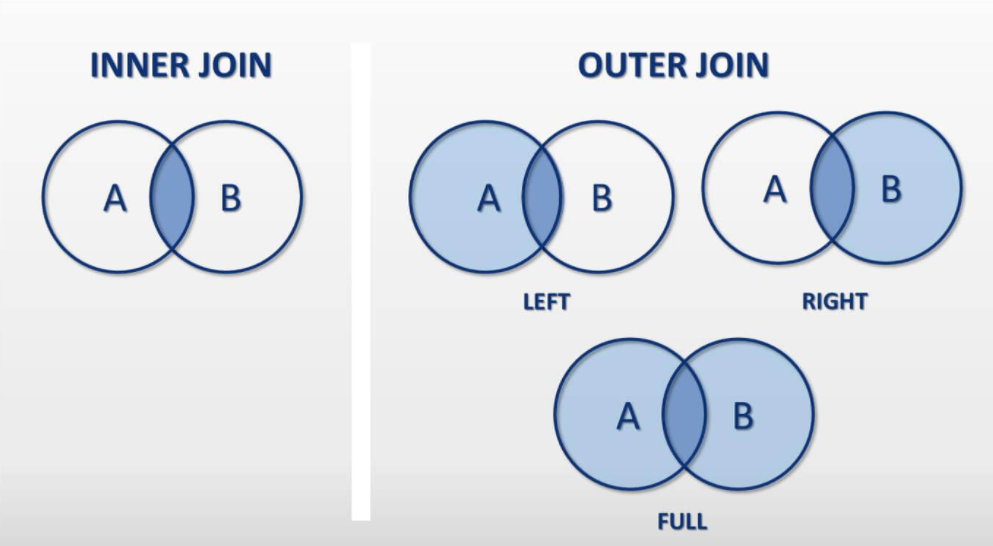

**inner** (внутреннее)

При использовании такого типа объединения в результирующей таблице остаются только те записи, которые есть в обеих таблицах.

Аналогия в теории множеств
Пересечение (intersection) множеств А и В.

Строки, для которых совпадение не было найдено, удаляются.

**outer** (внешнее)

Данный тип делится на три подтипа:

* full — используется как outer по умолчанию, объединяет все варианты в обеих таблицах.

Аналогия в теории множеств
Объединение (union) множеств А и В.

* left — для всех записей из «левой» таблицы (например, ratings) ведётся поиск соответствий в «правой» (например, movies). В результирующей таблице останутся только те значения, которым были найдены соответствия, то есть только значения из ratings.

Аналогия в теории множеств
Вычитание (difference) множества B из результата объединения (union) множеств А и В.

* right — аналогично предыдущему, но остаются значения только из «правой» таблицы. 

Аналогия в теории множеств
Вычитание (difference) множества А из результата объединения (union) множеств А и В.



### Метод объединения join

Для объединения двух таблиц по индексам используется метод DataFrame join(). Однако данный метод можно применить и для того, чтобы объединить таблицы по ключевому столбцу (в нашем случае это movieId).

* other — таблица, которую мы присоединяем. При объединении она является «правой», а исходная таблица, от имени которой вызывается метод, является «левой».

* how — параметр типа объединения. Он может принимать значения 'inner', 'left' (left outer), 'right' (right outer), и 'outer' (full outer). По умолчанию параметр установлен на 'left'.

* on — параметр, который определяет, по какому столбцу в «левой» таблице происходит объединение по индексам из «правой».
lsuffix и rsuffix — дополнения (суффиксы) к названиям одноимённых столбцов в «левой» и «правой» таблицах.

*Если использовать метод join() «в лоб» (без указания ключевого столбца), то объединение произойдёт, как и задумано — по индексам двух таблиц согласно установленному типу объединения.*

Проверим это, объединив таблицы типом left. Так как в наших таблицах есть одноимённые столбцы, установим один из суффиксов, чтобы избежать ошибки:

In [ ]:
# К ratings_dates прибавили таблицу movies и она оказалась справа
joined_false = ratings_dates.join(
    movies,
    rsuffix='_right',
    how='left'
)
display(joined_false)

,userId,movieId,rating,date,movieId_right,title,genres
0,1,1,4.0,2000-07-30 18:45:03,1.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,2000-07-30 18:20:47,2.0,Jumanji (1995),Adventure|Children|Fantasy
2,1,6,4.0,2000-07-30 18:37:04,3.0,Grumpier Old Men (1995),Comedy|Romance
3,1,47,5.0,2000-07-30 19:03:35,4.0,Waiting to Exhale (1995),Comedy|Drama|Romance
4,1,50,5.0,2000-07-30 18:48:51,5.0,Father of the Bride Part II (1995),Comedy
...,...,...,...,...,...,...,...
100831,610,166534,4.0,2017-05-03 21:53:22,NaN,NaN,NaN
100832,610,168248,5.0,2017-05-03 22:21:31,NaN,NaN,NaN
100833,610,168250,5.0,2017-05-08 19:50:47,NaN,NaN,NaN
100834,610,168252,5.0,2017-05-03 21:19:12,NaN,NaN,NaN


Однако это не тот результат, который мы хотели, ведь мы не получили соответствия фильмов и их рейтингов. Чтобы совместить таблицы по ключевому столбцу с помощью метода join(), необходимо использовать ключевой столбец в «правой» таблице в качестве индекса. Это можно сделать с помощью метода set_index(). Также необходимо указать название ключа в параметре on.

In [47]:
joined = ratings_dates.join(
    movies.set_index('movieId'),
    on='movieId',
    how='left'
)
display(joined.head())

,userId,movieId,rating,date,title,genres
0,1,1,4.0,2000-07-30 18:45:03,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,2000-07-30 18:20:47,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,2000-07-30 18:37:04,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,2000-07-30 19:03:35,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,2000-07-30 18:48:51,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


В результате такого объединения для каждого идентификатора фильма movieId в таблице ratings_dates найден совпадающий с ним идентификатор movieId в таблице movies и присоединена информация о самом фильме (title и genres). Это как раз то, что нам нужно.

## Метод объединения merge

Аналогично предыдущему, метод merge() предназначен для слияния двух таблиц по ключевым столбцам или по индексам. Однако, в отличие от join(), метод merge() предлагает более гибкий способ управления объединением, благодаря чему является более популярным.

* right — присоединяемая таблица. По умолчанию она является «правой».

* how — параметр типа объединения. По умолчанию принимает значение 'inner'.

* on — параметр, который определяет, по какому столбцу происходит объединение. Определяется автоматически, но рекомендуется указывать вручную.

* left_on — если названия столбцов в «левой» и «правой» таблицах не совпадают, то данный параметр отвечает за наименования ключевого столбца исходной таблицы.

* right_on — аналогично предыдущему, параметр отвечает за наименование ключевого столбца присоединяемой таблицы.

→ Метод merge() в первую очередь предназначен для слияния таблиц по заданным ключам, поэтому он не требует установки ключевых столбцов в качестве индекса присоединяемой таблицы. Кроме того, данный метод позволяет объединять даже таблицы с разноимёнными ключами. Таким образом, merge() проще в использовании и более многофункционален, чем схожие методы.

In [48]:
merged = ratings_dates.merge(
    movies,
    on='movieId',
    how='left'
)
display(merged.head())

,userId,movieId,rating,date,title,genres
0,1,1,4.0,2000-07-30 18:45:03,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,2000-07-30 18:20:47,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,2000-07-30 18:37:04,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,2000-07-30 19:03:35,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,2000-07-30 18:48:51,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


Проверим, что число строк в таблице ratings_dates совпадает с числом строк в результирующей таблице merged:

In [49]:
print('Число строк в таблице ratings_dates: ', ratings_dates.shape[0])
print('Число строк в таблице merged: ', merged.shape[0])
print(ratings_dates.shape[0] == merged.shape[0])

Число строк в таблице ratings_dates:  100836
Число строк в таблице merged:  100836
True


Особенности использования merge()

Возникает вопрос: почему мы выбрали тип объединения left, а не full, например?

Найти ответ нам поможет пример. Объединим ratings_dates с movies по ключевому столбцу movieId, но с параметром how='outer' (full outer) и выведем размер таблицы, а также её «хвост»:

In [51]:
merged2 = ratings_dates.merge(
    movies,
    on='movieId',
    how='outer'
)
print('Число строк в таблице ratings_dates: ', ratings_dates.shape[0])
print('Число строк в таблице merged2: ', merged2.shape[0])
print(ratings_dates.shape[0] == merged2.shape[0])
display(merged2.tail())

Число строк в таблице ratings_dates:  100836
Число строк в таблице merged2:  100854
False


,userId,movieId,rating,date,title,genres
100849,184.0,193581,4.0,2018-09-16 14:44:42,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
100850,184.0,193583,3.5,2018-09-16 14:52:25,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
100851,184.0,193585,3.5,2018-09-16 14:56:45,Flint (2017),Drama
100852,184.0,193587,3.5,2018-09-16 15:00:21,Bungo Stray Dogs: Dead Apple (2018),Action|Animation
100853,331.0,193609,4.0,2018-09-17 04:13:26,Andrew Dice Clay: Dice Rules (1991),Comedy


Результирующее число строк в таблице увеличилось. Но за счёт чего?

Оказывается, в таблице movies содержались фильмы, которым ещё не были выставлены оценки. В результате объединения типом full outer информация о фильмах перенеслась из таблицы movies в результирующую таблицу. Однако, поскольку оценки фильмам ещё не были выставлены, соответствующие столбцы таблицы ratings_dates заполнились пропусками (NaN). Такие фильмы были записаны в конец таблицы.

*Важно! Учитывайте такие нюансы при работе с несколькими таблицами и всегда проверяйте результат объединения.*


→ Метод merge() с внешним (outer) типом объединения может использоваться как аналог метода concat() при объединении таблиц с одинаковой структурой (одинаковые количество и названия столбцов) по строкам. В таком случае все одноимённые столбцы таблиц будут считаться ключевыми.

Рассмотрим пример: объединим таблицы ratings1 и ratings2, как мы уже делали раньше, но теперь используем метод merge():



In [52]:
merge_ratings = ratings1.merge(ratings2, how='outer')
print('Число строк в таблице merge_ratings: ', merge_ratings.shape[0])
display(merge_ratings)

Число строк в таблице merge_ratings:  100836


,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
...,...,...,...
100831,610,166534,4.0
100832,610,168248,5.0
100833,610,168250,5.0
100834,610,168252,5.0


*Обратите внимание, что при использовании метода merge() для склейки двух таблиц у нас автоматически пропали дубликаты, которые мы видели при использовании метода concat(). Это особенность метода merge() — автоматическое удаление дублей.*

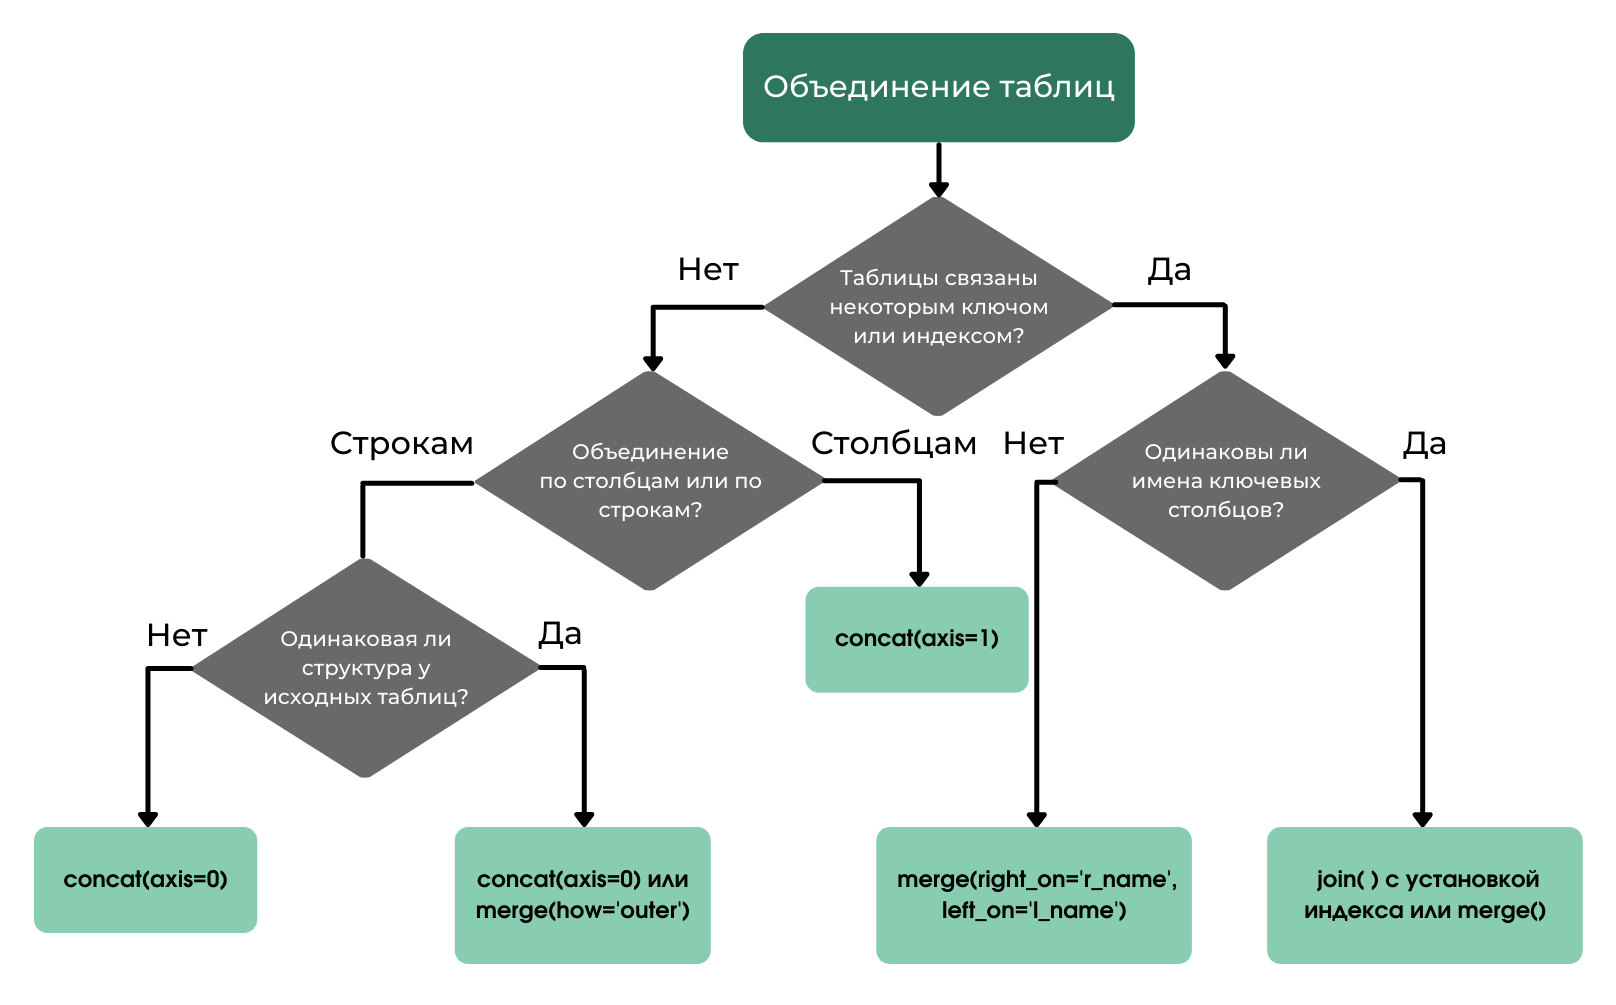

## Задание 

Даны две таблицы: items_df, в которой содержится информация о наличии товаров на складе, и purchase_df с данными о покупках товаров.

Сформируйте DataFrame merged, так чтобы после объединения purchase_df и items_df остались модели, которые учтены на складе и имели продажи.

На основе таблицы merged найдите суммарную выручку, которую можно было бы получить от продажи всех товаров, имеющихся на складе. Результат занесите в переменную income.

In [56]:
import pandas as pd

items_df = pd.DataFrame({
            'item_id': [417283, 849734, 132223, 573943, 19475, 3294095, 382043, 302948, 100132, 312394],
            'vendor': ['Samsung', 'LG', 'Apple', 'Apple', 'LG', 'Apple', 'Samsung', 'Samsung', 'LG', 'ZTE'],
            'stock_count': [54, 33, 122, 18, 102, 43, 77, 143, 60, 19]
        })

purchase_df = pd.DataFrame({
            'purchase_id': [101, 101, 101, 112, 121, 145, 145, 145, 145, 221],
            'item_id': [417283, 849734, 132223, 573943, 19475, 3294095, 382043, 302948, 103845, 100132],
            'price': [13900, 5330, 38200, 49990, 9890, 33000, 67500, 34500, 89900, 11400]
        })

# Введите свое решение ниже

# Объединяем таблицы по item_id, оставляя только совпадающие модели
merged = items_df.merge(
    purchase_df,
    on='item_id',
    how='inner')

# Вычисляем суммарную выручку: price * stock_count для каждой модели, затем суммируем
income = (merged['price'] * merged['stock_count']).sum()

print(merged)


   item_id   vendor  stock_count  purchase_id  price
0   417283  Samsung           54          101  13900
1   849734       LG           33          101   5330
2   132223    Apple          122          101  38200
3   573943    Apple           18          112  49990
4    19475       LG          102          121   9890
5  3294095    Apple           43          145  33000
6   382043  Samsung           77          145  67500
7   302948  Samsung          143          145  34500
8   100132       LG           60          221  11400


Для решения задач нам понадобится выделить из признака title год выпуска фильма. Для этого напишем функцию get_year_release(arg).

In [ ]:
#библиотека для регулярных выражений
import re 


def get_year_release(arg):
    #находим все слова по шаблону "(DDDD)"
    candidates = re.findall(r'\(\d{4}\)', arg) 
    # проверяем число вхождений
    if len(candidates) > 0:
        #если число вхождений больше 0,
	#очищаем строку от знаков "(" и ")"
        year = candidates[0].replace('(', '')
        year = year.replace(')', '')
        return int(year)
    else:
        #если год не указан, возвращаем None
        return None

Из модуля re нам понадобится только функция findall(), которая позволяет найти в строке все слова, удовлетворяющие шаблону. Мы находим в строке с названием фильма шаблон "(DDDD)" — четыре цифры, обёрнутых в скобки, что соответствует году выпуска фильма. Если такого шаблона не было найдено (год выпуска не указан), функция возвращает None (в таблице это будет помечено как пропуск).